In [2]:
# 自信息=-log(p(x))

def possiblity(x,all_val):
    count=0
    for i in all_val:
        if i==x:
            count+=1
    return count/len(all_val)


possiblity(2,[1,2,2,3,2,4])

0.5

In [3]:
import math
def self_info(x,all_val):
    return -1*math.log(possiblity(x,all_val))

self_info(3,[3,4,6,6,6,3])

1.0986122886681098

In [4]:
# 条件概率

def posibility_given_b(pab,pb):
    return pab/pb

# 骰子 123456 已知结果是偶数 那么结果是4的概率为: 1/3
posibility_given_b(1/6,1/2)

0.3333333333333333

In [12]:
# 熵是对平均不确定性的度量

def entrophy(all_val):
    en=0
    for i in set(all_val):
        en+=possiblity(i,all_val)*self_info(i,all_val)
    return en

entrophy([1,2,3,4,5,6])

1.7917594692280547

In [13]:
entrophy([1,2,3,4,5,6,8])

1.945910149055313

In [14]:
entrophy([1,2,3,4,5,6,9])

1.945910149055313

In [15]:
entrophy([1,2,3,4,5,6,9,0])

2.0794415416798357

In [16]:
entrophy([1,2,3,4,5,6,9,9])

1.9061547465398496

In [17]:
# 若随机变量退化为定值 则熵为零
entrophy([1])

0.0

[ 0.0460517   0.16880464  0.24280024  0.29321303  0.32773603  0.35023915
  0.36306672  0.36779445  0.36555523  0.35720324  0.34340572  0.32469836
  0.30152076  0.27424019  0.24316812  0.208572    0.17068404  0.12970769
  0.08582272  0.03918911 -0.01004983 -0.06176504 -0.11583962 -0.17216721
 -0.23065064 -0.29120077 -0.35373555 -0.41817919 -0.48446148 -0.5525172
 -0.62228557 -0.69370988 -0.76673703 -0.84131722 -0.91740366 -0.9949523
 -1.07392159 -1.15427227 -1.23596719 -1.31897117]


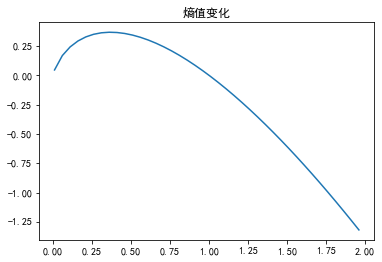

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

x=np.arange(0.01,2,0.05)

y=-x*np.log(x)

print(y)

plt.title('熵值变化')
plt.plot(x,y)
plt.show()

In [32]:
# 互信息: 新增信息对不确定性的减少
# 例：已知骰子结果是偶数，骰子结果是6的互信息
allV=[1,2,3,4,5,6]

pb=possiblity(0,[0,1])
pab=possiblity(6,allV)

# log(后验概率/先验概率)
# 先验 Prior probability：在这里是1/6，没有附加条件的
# the prior probability of a random event or an uncertain proposition is 
# the unconditional probability that is assigned before any relevant evidence is taken into account.
# 后验 Posterior probability：在这里是1/3，得知是偶数后的
# 后验概率一般大于先验概率?
self_info(6,allV)-(-math.log(posibility_given_b(pab,pb)))

0.6931471805599452

[ 4.60517019  2.81341072  2.20727491  1.83258146  1.56064775  1.34707365
  1.17118298  1.02165125  0.89159812  0.77652879  0.67334455  0.5798185
  0.49429632  0.41551544  0.34249031  0.27443685  0.21072103  0.15082289
  0.09431068  0.04082199 -0.00995033 -0.05826891]


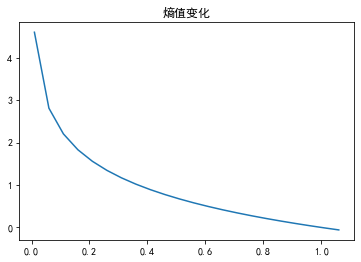

In [30]:
# 自信息的函数变化：概率越小，包含的信息量越大
x=np.arange(0.01,1.1,0.05)

y=-np.log(x)

print(y)

plt.title('对数变化')
plt.plot(x,y)
plt.show()

In [75]:
np.random.randint(0,20,size=[4,4])

# 输出一个离散联合概率分布
# 边缘概率分布
import random

total=100
residual=total
r=4
c=5
size=r*c
jp=[]
for i in range(0,size):
    if i==size-1:
        gen=residual
    else:
        gen=random.randint(1,int(residual/4))
    residual-=gen
    jp.append(gen)
    print(f"{i}={gen}, r={residual}")

print(jp)
sum(jp)
jp_matrix=np.array(jp).reshape(r,c)/100
jp_matrix

0=13, r=87
1=10, r=77
2=10, r=67
3=1, r=66
4=6, r=60
5=13, r=47
6=8, r=39
7=1, r=38
8=1, r=37
9=5, r=32
10=3, r=29
11=2, r=27
12=6, r=21
13=4, r=17
14=1, r=16
15=1, r=15
16=2, r=13
17=1, r=12
18=1, r=11
19=11, r=0
[13, 10, 10, 1, 6, 13, 8, 1, 1, 5, 3, 2, 6, 4, 1, 1, 2, 1, 1, 11]


array([[0.13, 0.1 , 0.1 , 0.01, 0.06],
       [0.13, 0.08, 0.01, 0.01, 0.05],
       [0.03, 0.02, 0.06, 0.04, 0.01],
       [0.01, 0.02, 0.01, 0.01, 0.11]])

In [77]:
#计算联合熵
print(math.log(0.13))
print(np.log(jp_matrix))
joint_entrophy=-np.sum(jp_matrix*np.log(jp_matrix))
joint_entrophy

-2.0402208285265546
[[-2.04022083 -2.30258509 -2.30258509 -4.60517019 -2.81341072]
 [-2.04022083 -2.52572864 -4.60517019 -4.60517019 -2.99573227]
 [-3.5065579  -3.91202301 -2.81341072 -3.21887582 -4.60517019]
 [-4.60517019 -3.91202301 -4.60517019 -4.60517019 -2.20727491]]


2.6360234688507664

In [79]:
y_margin=np.sum(jp_matrix,1)
print(y_margin)
y_entrophy=-np.sum(y_margin*np.log(y_margin))
y_entrophy

[0.4  0.28 0.16 0.16]


1.3093727503767298

In [80]:
# 条件熵计算方法1 H(X,Y)-H(Y)
conditional_entrophy_x_given_y=joint_entrophy-y_entrophy
conditional_entrophy_x_given_y

1.3266507184740366

In [81]:
# 条件熵计算方法2 公式法 -sigma(p(x,y)*log(p(x|y)))
# p(x|y)=p(x,y)/p(y)
1/y_margin

array([2.5       , 3.57142857, 6.25      , 6.25      ])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


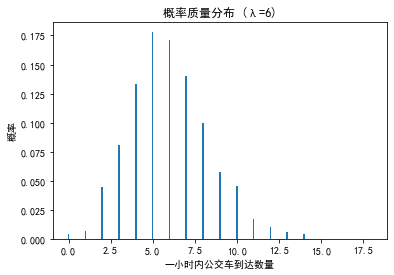

In [39]:
lamb = 6
sample = np.random.poisson(lamb, size=1000)  # 生成1000个符合泊松分布的随机数
bins = np.arange(20)
print(bins)
plt.hist(sample, bins=bins, align='left', rwidth=0.1, density=True) # bins也就是总共有几条条状图,density表示条形图的总面积为1.
plt.title('概率质量分布 (λ=6)')
plt.xlabel('一小时内公交车到达数量')
plt.ylabel('概率')
plt.show()

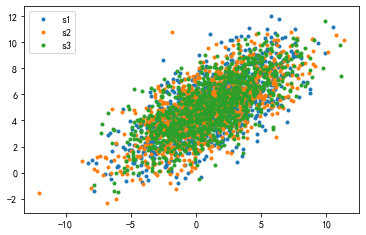

In [40]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt

sampleNo = 1000
mu = np.array([[1, 5]])
Sigma = np.array([[10, 5], [5, 5]])
R = cholesky(Sigma).T
va,vc = np.linalg.eig(Sigma); R2 = (np.diag(va)**0.5)@vc.T

s1 = np.random.randn(sampleNo, 2) @ R + mu #法1
s2 = np.random.randn(sampleNo, 2) @ R2 + mu #法2
s3 = np.random.multivariate_normal(mu[0],Sigma,sampleNo) #法3

plt.plot(*s1.T,'.',label = 's1')
plt.plot(*s2.T,'.',label = 's2')
plt.plot(*s3.T,'.',label = 's3')
plt.axis('scaled')
plt.legend()

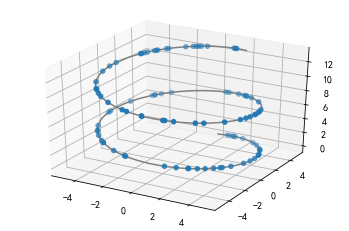

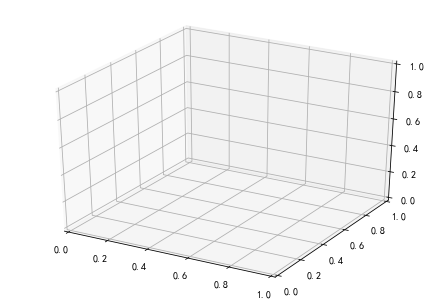

In [47]:
#方法一，利用关键字
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#定义坐标轴
fig = plt.figure()
ax1 = plt.axes(projection='3d')
#ax = fig.add_subplot(111,projection='3d')  #这种方法也可以画多个子图


#方法二，利用三维轴方法
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#定义图像和三维格式坐标轴
fig=plt.figure()
ax2 = Axes3D(fig)

import numpy as np
z = np.linspace(0,13,1000)
x = 5*np.sin(z)
y = 5*np.cos(z)


zd = 13*np.random.random(100)
xd = 5*np.sin(zd)
yd = 5*np.cos(zd)

ax1.scatter3D(xd,yd,zd, cmap='Blues')  #绘制散点图

ax1.plot3D(x,y,z,'gray')    #绘制空间曲线
plt.show()

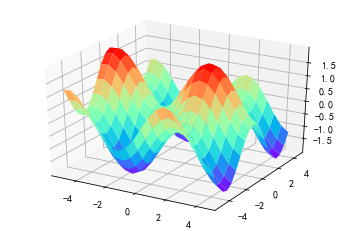

In [49]:
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = np.arange(-5,5,0.5)
yy = np.arange(-5,5,0.5)
X, Y = np.meshgrid(xx, yy)
Z = np.sin(X)+np.cos(Y)


#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')
# ax3.contour(X,Y,Z, zdim='z',offset=-2，cmap='rainbow)   #等高线图，要设置offset，为Z的最小值
plt.show()

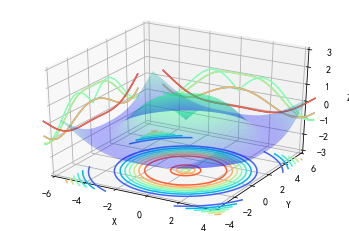

In [45]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#定义坐标轴
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')

#生成三维数据
xx = np.arange(-5,5,0.1)
yy = np.arange(-5,5,0.1)
X, Y = np.meshgrid(xx, yy)
Z = np.sin(np.sqrt(X**2+Y**2))

#作图
ax4.plot_surface(X,Y,Z,alpha=0.3,cmap='winter')     #生成表面， alpha 用于控制透明度
ax4.contour(X,Y,Z,zdir='z', offset=-3,cmap="rainbow")  #生成z方向投影，投到x-y平面
ax4.contour(X,Y,Z,zdir='x', offset=-6,cmap="rainbow")  #生成x方向投影，投到y-z平面
ax4.contour(X,Y,Z,zdir='y', offset=6,cmap="rainbow")   #生成y方向投影，投到x-z平面
#ax4.contourf(X,Y,Z,zdir='y', offset=6,cmap="rainbow")   #生成y方向投影填充，投到x-z平面，contourf()函数

#设定显示范围
ax4.set_xlabel('X')
ax4.set_xlim(-6, 4)  #拉开坐标轴范围显示投影
ax4.set_ylabel('Y')
ax4.set_ylim(-4, 6)
ax4.set_zlabel('Z')
ax4.set_zlim(-3, 3)

plt.show()

In [51]:
A=np.array([[1,1,0,0,0,0],[0,0,1,1,0,0],[0,0,0,0,1,1],[1,0,0,0,0,1],[0,1,0,1,0,0],[0,0,1,0,1,0]])
np.linalg.eig(A)

(array([ 2.00000000e+00+0.j       , -3.41163902e-01+1.1615414j,
        -3.41163902e-01-1.1615414j,  6.82327804e-01+0.j       ,
         2.08886560e-16+0.j       , -1.00000000e+00+0.j       ]),
 array([[-0.40824829+0.j        ,  0.11158152-0.24454397j,
          0.11158152+0.24454397j, -0.65998362+0.j        ,
         -0.40824829+0.j        , -0.28867513+0.j        ],
        [-0.40824829+0.j        ,  0.13439884+0.45758011j,
          0.13439884-0.45758011j,  0.20965845+0.j        ,
          0.40824829+0.j        ,  0.57735027+0.j        ],
        [-0.40824829+0.j        , -0.24598036-0.21303613j,
         -0.24598036+0.21303613j,  0.45032517+0.j        ,
          0.40824829+0.j        , -0.28867513+0.j        ],
        [-0.40824829+0.j        , -0.33136991+0.21303613j,
         -0.33136991-0.21303613j, -0.30726939+0.j        ,
         -0.40824829+0.j        , -0.28867513+0.j        ],
        [-0.40824829+0.j        ,  0.57735027+0.j        ,
          0.57735027-0.j        , -